

<center> <h1> Evolution of emotions conveyed by media and their link with the society state </h1> 
<h2> Project Milestone 2 </h2> </center>

<h2> Data collection </h2> 

<u> Source location related data : </u>

When we started processing the data located on the cluster (*'/datasets/gdeltv2'*), we encountered a serious issue : very surprisingly, the dataset does not contain relevent record related to the media source location (like translation information). However, we planned in Milestone 1 to focus our project on the specificity of the medias related to their home country.
Thus we spent a lot of time on trying to find ways to circumvent this issue and get information about the source location by other means.
<br>
<ol>
    <li>First, we looked at URL extensions. Indeed, some countries have specific URL extentions (‘.fr’, ‘.it’, etc), and we can use this criterion to filter event mentions.
However, this solution is clearly not very representative because most of the sources (METTRE QUERY QUI PROUVE CE FAIT) have a ‘.com’ extension, and this in not informative. Moreover, countries like the USA only use ‘.com’ extensions. </li> <br>
    
<li>Then, we chose a different strategy : we searched for rankings (EST-CE QU’ON PEUT TROUVER DES RANKINGS PLUS FIABLES?) to get the main online medias in a small sample of countries (France, USA). Then we stored these lists of sources and we filtered the event mentions dataset to get medias related to these sources. If we base these queries on relevant information (selection of the principal medias), this strategy can be a good option. However, it requires a lot of manual work, and we had many issues related to the string filter used. Indeed, if fetching only the sources whose name is strictly <i>‘foxnews.com’</i> for example, one would miss <i>'foxcarolina.com'</i> and all the other state-specific or city-specific related webpages. But if we set a very open regular expression like ‘%fox%' or '%wsj%' (for the Wall Street Journal), we get a lot of false negatives like <i>'thenewsjournal.net'</i> or <i>'ctnewsjunkie.com'</i>. </li> <br>

<li>Lastly, we discovered that GDELT generated exactly what we needed: <i>'sources_by_country.csv'</i> a table that matches the sources names ('Domain') with the FIPS-code of their country. This table was generated in may 2018 and is based on the gdelt dataset. It is not perfectly accurate but gives us a sufficient precise information (more informations on <a href=“https://blog.gdeltproject.org/mapping-the-media-a-geographic-lookup-of-gdelts-sources/”> gdelt blog</a>). 
    </li>
</ol> 
From now on, we will use Google BigQuery to make queries related to sources locations. The other big advantage of this tool, is that queries are running very fast, whereas when using the cluster, we wait sometimes a whole day for our job to be executed because of the queue.

<u> ADD OTHER INFORMATION </u>

## Data processing

In [2]:
import findspark
findspark.init()
import matplotlib.pyplot as plt
from pyspark.sql.types import *
import datetime as dt
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import scipy as sp
from pyspark.sql import *
%matplotlib inline
import seaborn as sn
sn.set(color_codes=True)
spark = SparkSession.builder.getOrCreate()

In [16]:
data_folder= './Data/'

### 1. Are the medias becoming more and more anxiogenic ? Is there a specific trend during a year time ?

Then, we decided to observe whether we notice a periodic trend in the way mediatic tone evolves accross year months. For example, is summer more prone to positive news ?

For now (as it was just a first overview to find what was feasible with the dataset), we focused on *'.fr'* and *'.it'* URL-extended sources, in order to observe these trends for French and Italian medias. When using this strategy to get source location, we have to be aware that we are excluding a lot of mentions which have the *'.com'* or *'.net'* extensions for example.

We run a Python script on the cluster (see *'./Codes/get_monthIntervalMentions.py'*) in order to write as parquet files these specific mentions.


#### EN RUNNANT LES CELLULES SUIVANTES : VOIR PQ IL Y A AUTANT DE VALEURS NULLES (e.g. en selectionnant aussi le field 'Year-Month-Day' pour voir si il est nul aussi)

In [3]:
fr_mentions = spark.read.parquet("fr_mentions_casted_date.parquet")
fr_mentions = fr_mentions.select('MentionSourceName','MentionDocTone', 'Month')
fr_mentions.show()

+------------------+--------------+-----+
| MentionSourceName|MentionDocTone|Month|
+------------------+--------------+-----+
|         en.rfi.fr|    -3.5971222|   12|
|       thelocal.fr|   -0.22396417|    6|
|diplomatie.gouv.fr|     3.0120482|    6|
|diplomatie.gouv.fr|     3.0120482|    6|
|       thelocal.fr|   -0.22396417|    6|
|       thelocal.fr|   -0.22396417|    6|
|       thelocal.fr|   -0.22396417|    6|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     -2.868069|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     1.4035088|    3|
|         en.rfi.fr|      -3.49162|    3|
|         en.rfi.fr|     1.4035088|    3|
|         en.rfi.fr|    -5.9479556|    3|
|         en.rfi.fr|    -5.9479556|    3|
|          inria.fr|     3.4206307|    2|
|          inria.fr|     3.0560272|    2|
|          inria.fr|     1.5261627|    2|
+------------------+--------------

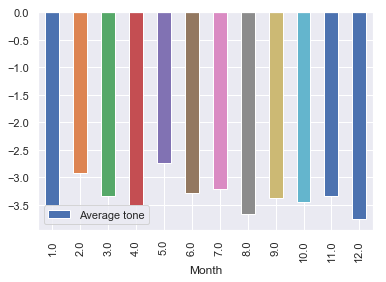

In [4]:
fr_mentions = fr_mentions.groupBy('Month').agg(mean('MentionDocTone').alias('Average tone'))

fr_mentions_Pandas_df = fr_mentions.toPandas()
fr_mentions_Pandas_df.dropna(inplace=True)
fr_mentions_Pandas_df.sort_values('Month', ascending=True, inplace=True)

fr_mentions_Pandas_df.plot.bar(x='Month', y='Average tone')

In [5]:
it_mentions = spark.read.parquet("it_mentions_casted_date.parquet")
it_mentions = it_mentions.select('MentionSourceName','MentionDocTone', 'Month')
it_mentions.show()

+--------------------+--------------+-----+
|   MentionSourceName|MentionDocTone|Month|
+--------------------+--------------+-----+
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|         lastampa.it|     1.8962076| null|
|firenze.repubblic...|     3.7974684|    6|
|firenze.repubblic...|     3.7974684|    6|
|firenze.repubblic...|     3.7974684|    6|
|lagazzettadelmezz...|           0.0|    6|
|lagazzettadelmezz...|           0.0|    6|
|           cutuli.it|      5.188679|    6|
|           cutuli.it|      5.188679|    6|
|           cutuli.it|      5.188679|    6|
|   gazzettadelsud.it|     -6.590909| null|
|   gazzettadelsud.it|    -7.1017275| null|
|lagazzettadelmezz...|    -7.101

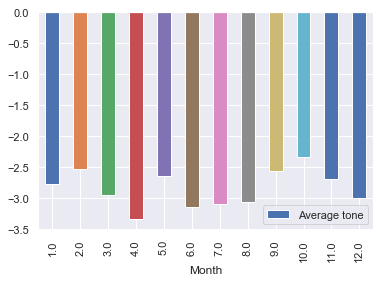

In [6]:
it_mentions = it_mentions.groupBy('Month').agg(mean('MentionDocTone').alias('Average tone'))

it_mentions_Pandas_df = it_mentions.toPandas()
it_mentions_Pandas_df.dropna(inplace=True)
it_mentions_Pandas_df.sort_values('Month', ascending=True, inplace=True)

it_mentions_Pandas_df.plot.bar(x='Month', y='Average tone')

We see that for these two specific countries, we do not have very obvious differences between year months. 
However...

AJOUTER INTERPRETATION PLUS COMPLETE

### 2. Can we find different trends in the media tone depending on the event location country ? On the source country ? Is their a link with the Happiness score of the country ?

First, let's look at mediatic tone, with respect to the event location country.
This analysis would allow us to determine whether the global news concerning a country's events are rather positive or negative. Then, we can see if there is a correlation with the actual happiness level of each country. 

### AJOUTER ICI LES RESULTATS DE SINAN (plots + correlation avec le bonheur)
#### Bien expliquer comment on a eu les data sur le bonheur et ce qu'on a fait pour lier les deux (FIPS code)

Note that some country values were missing in the Happiness World report, thus we will use inner join to get rid of countries which have no happiness score.

Now, using Google BigQuery tool, let's look at the mediatic tone related to the source country of event mentions.

The following query was run in order to get the average tone (field `MentionDocTone`) of mentions originating from the same country.
Indeed, by joining the `eventmentions` table to the `sourcesbycountry` table, we could very easily group the mentions by their source FIPS code and compute the average tone :

<img src="query_avgToneBySourceLocation.png" alt="drawing" width="500"/>

After extracting the newly created table `avgToneBySourceLocation_table`, we plotted the result.
Note that the result was splitted between positive and negative average tone in order to have smaller plots, but still be able to visualize the value for each country.

In [7]:
avgTone = spark.read.option("sep",",").option('header', 'true').csv("avgToneBySourceLocation_table.csv")
avgTone.show()
avgTone = avgTone.withColumn('AverageTone', avgTone['AverageTone'].cast(FloatType()))
avgTone.registerTempTable('avgTone_table')

+----+--------------------+
|FIPS|         AverageTone|
+----+--------------------+
|  IT| -1.2266319517342155|
|  WA| -2.1564389385620708|
|  CM| -2.9449712401336963|
|  ML| -1.4626035850125303|
|  MG|-0.24210924465101621|
|  PK| -2.9042192814547048|
|  GH| -1.9078195733342607|
|  KZ| -1.2593573700554748|
|  BM|  -2.257738120596255|
|  IN| -2.6352216561258954|
|  MI| -2.1356432264451626|
|  AV|  1.6529235384892216|
|  LT| -1.7559838499012681|
|  GB|-0.75436355420488421|
|  UK| -2.4232246650674325|
|  AU| -2.9686971461863192|
|  CK| -2.7693001028740176|
|  RS| -2.3112888288017395|
|  TW| -2.4235868152902853|
|  RI|  -1.003833159575332|
+----+--------------------+
only showing top 20 rows



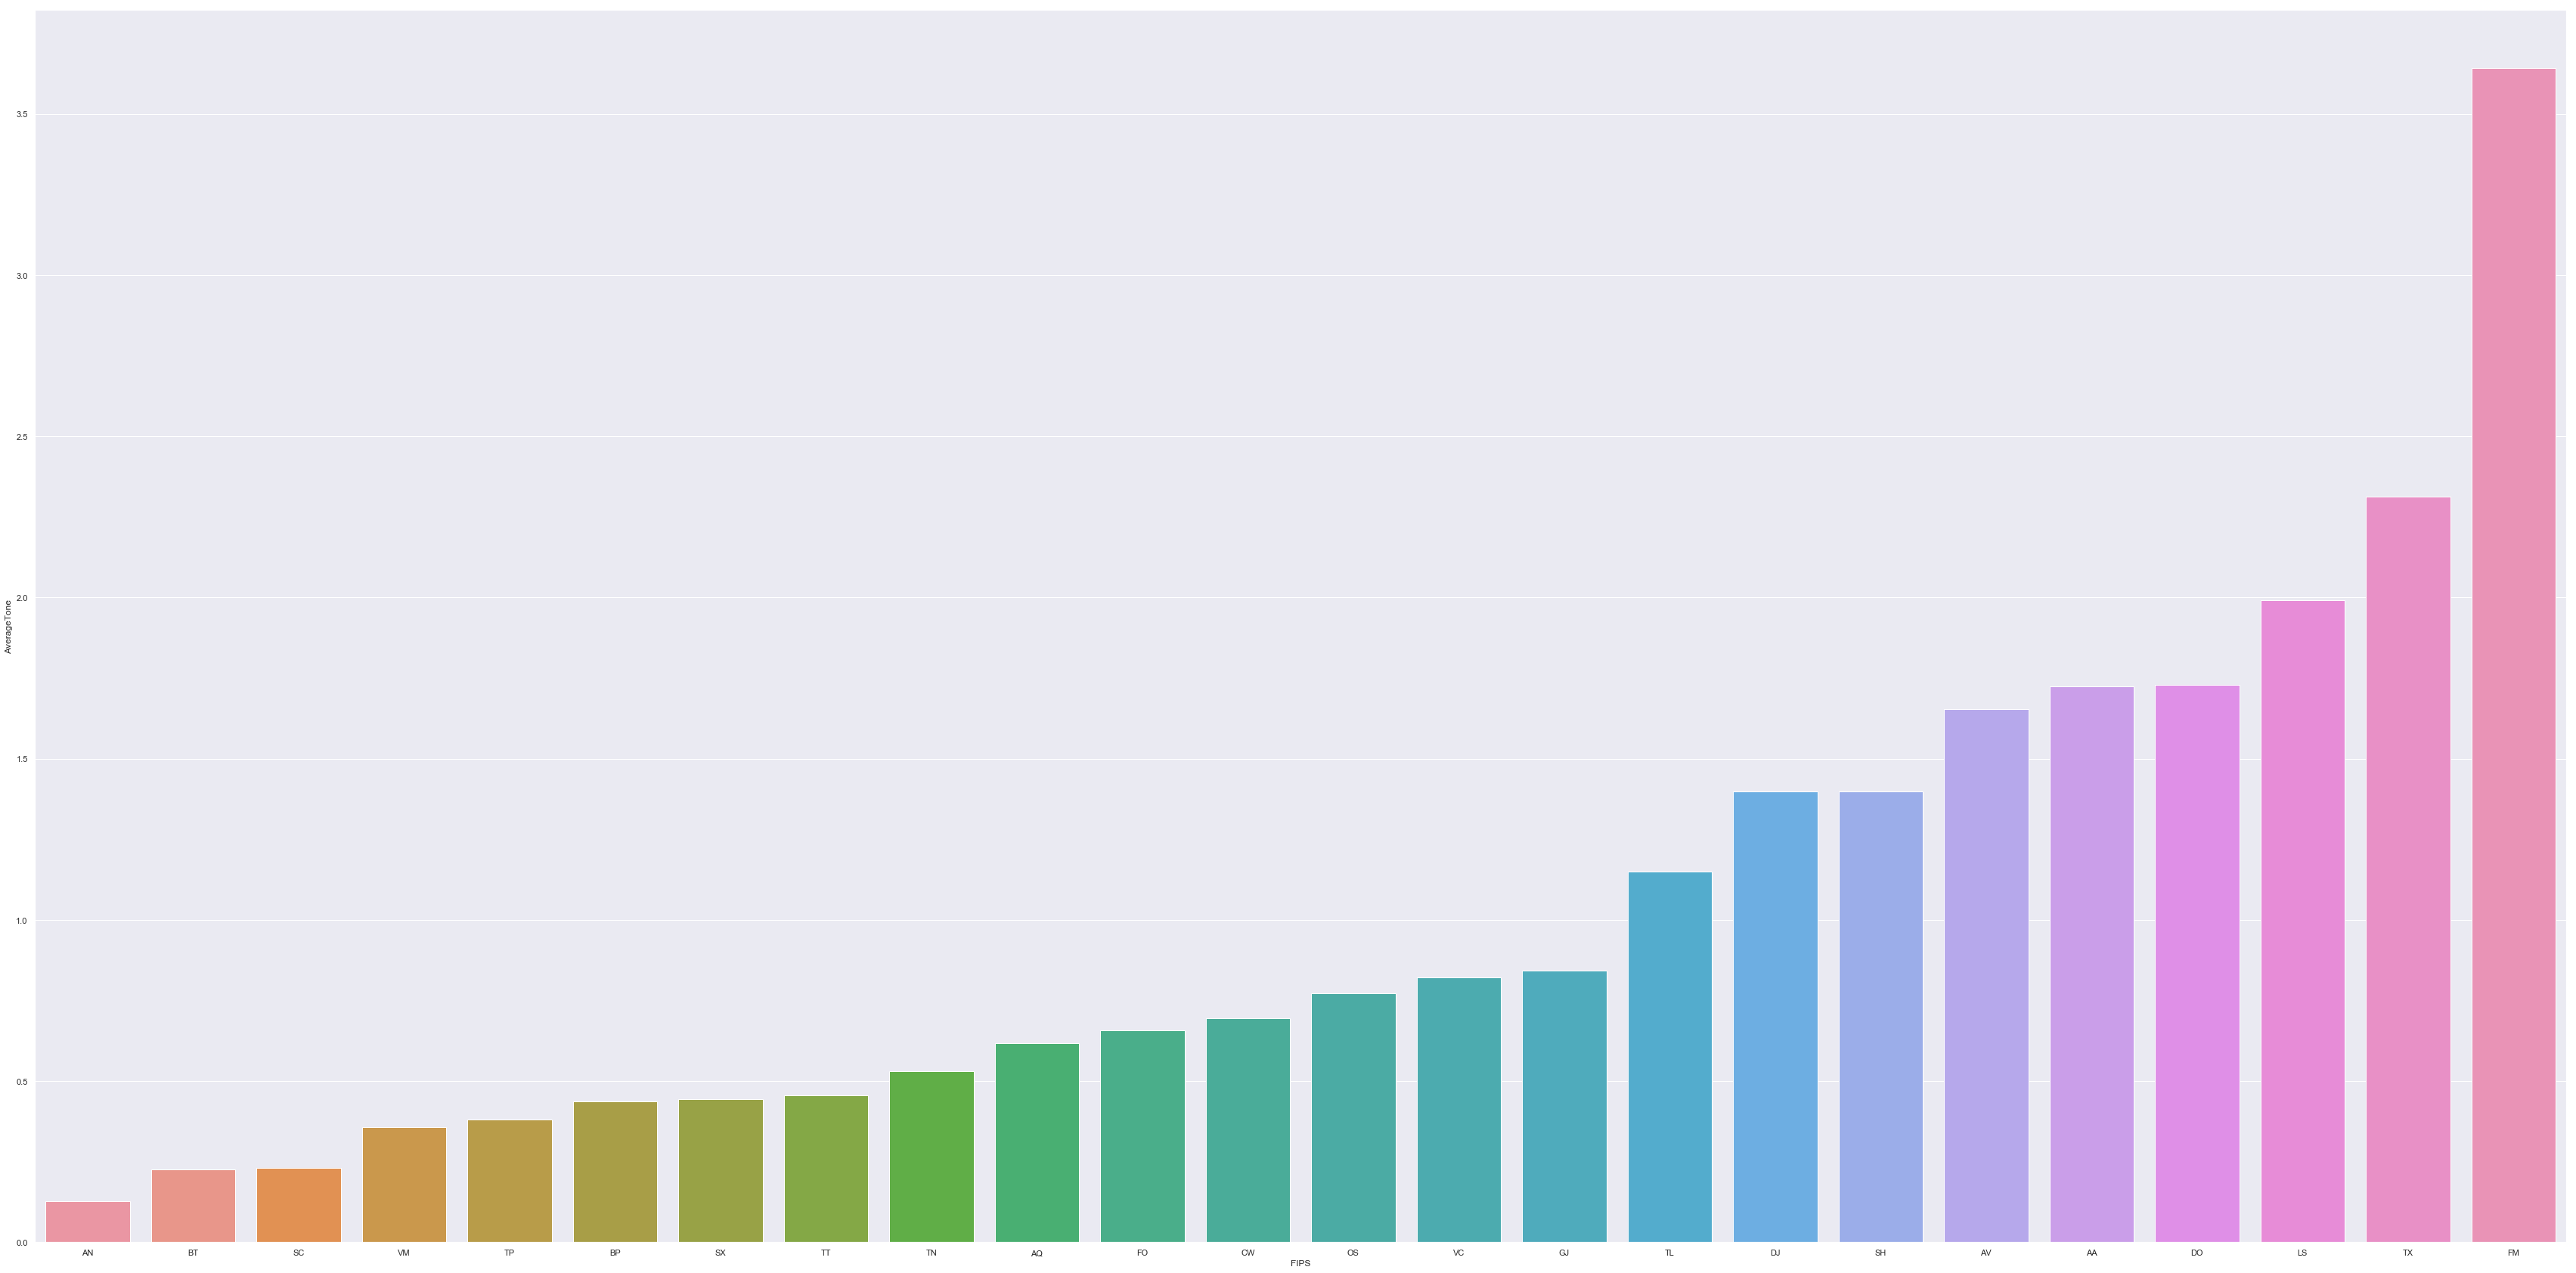

In [8]:
avgTone_pos = avgTone.filter('AverageTone > 0')
avgTone_pos_pandas = avgTone_pos.toPandas()
avgTone_pos_pandas.sort_values('AverageTone', ascending=True, inplace=True)

sn.set(rc={'figure.figsize':(60,30)})
plot = sn.barplot(x='FIPS', y='AverageTone',data=avgTone_pos_pandas)
fig = plot.get_figure()

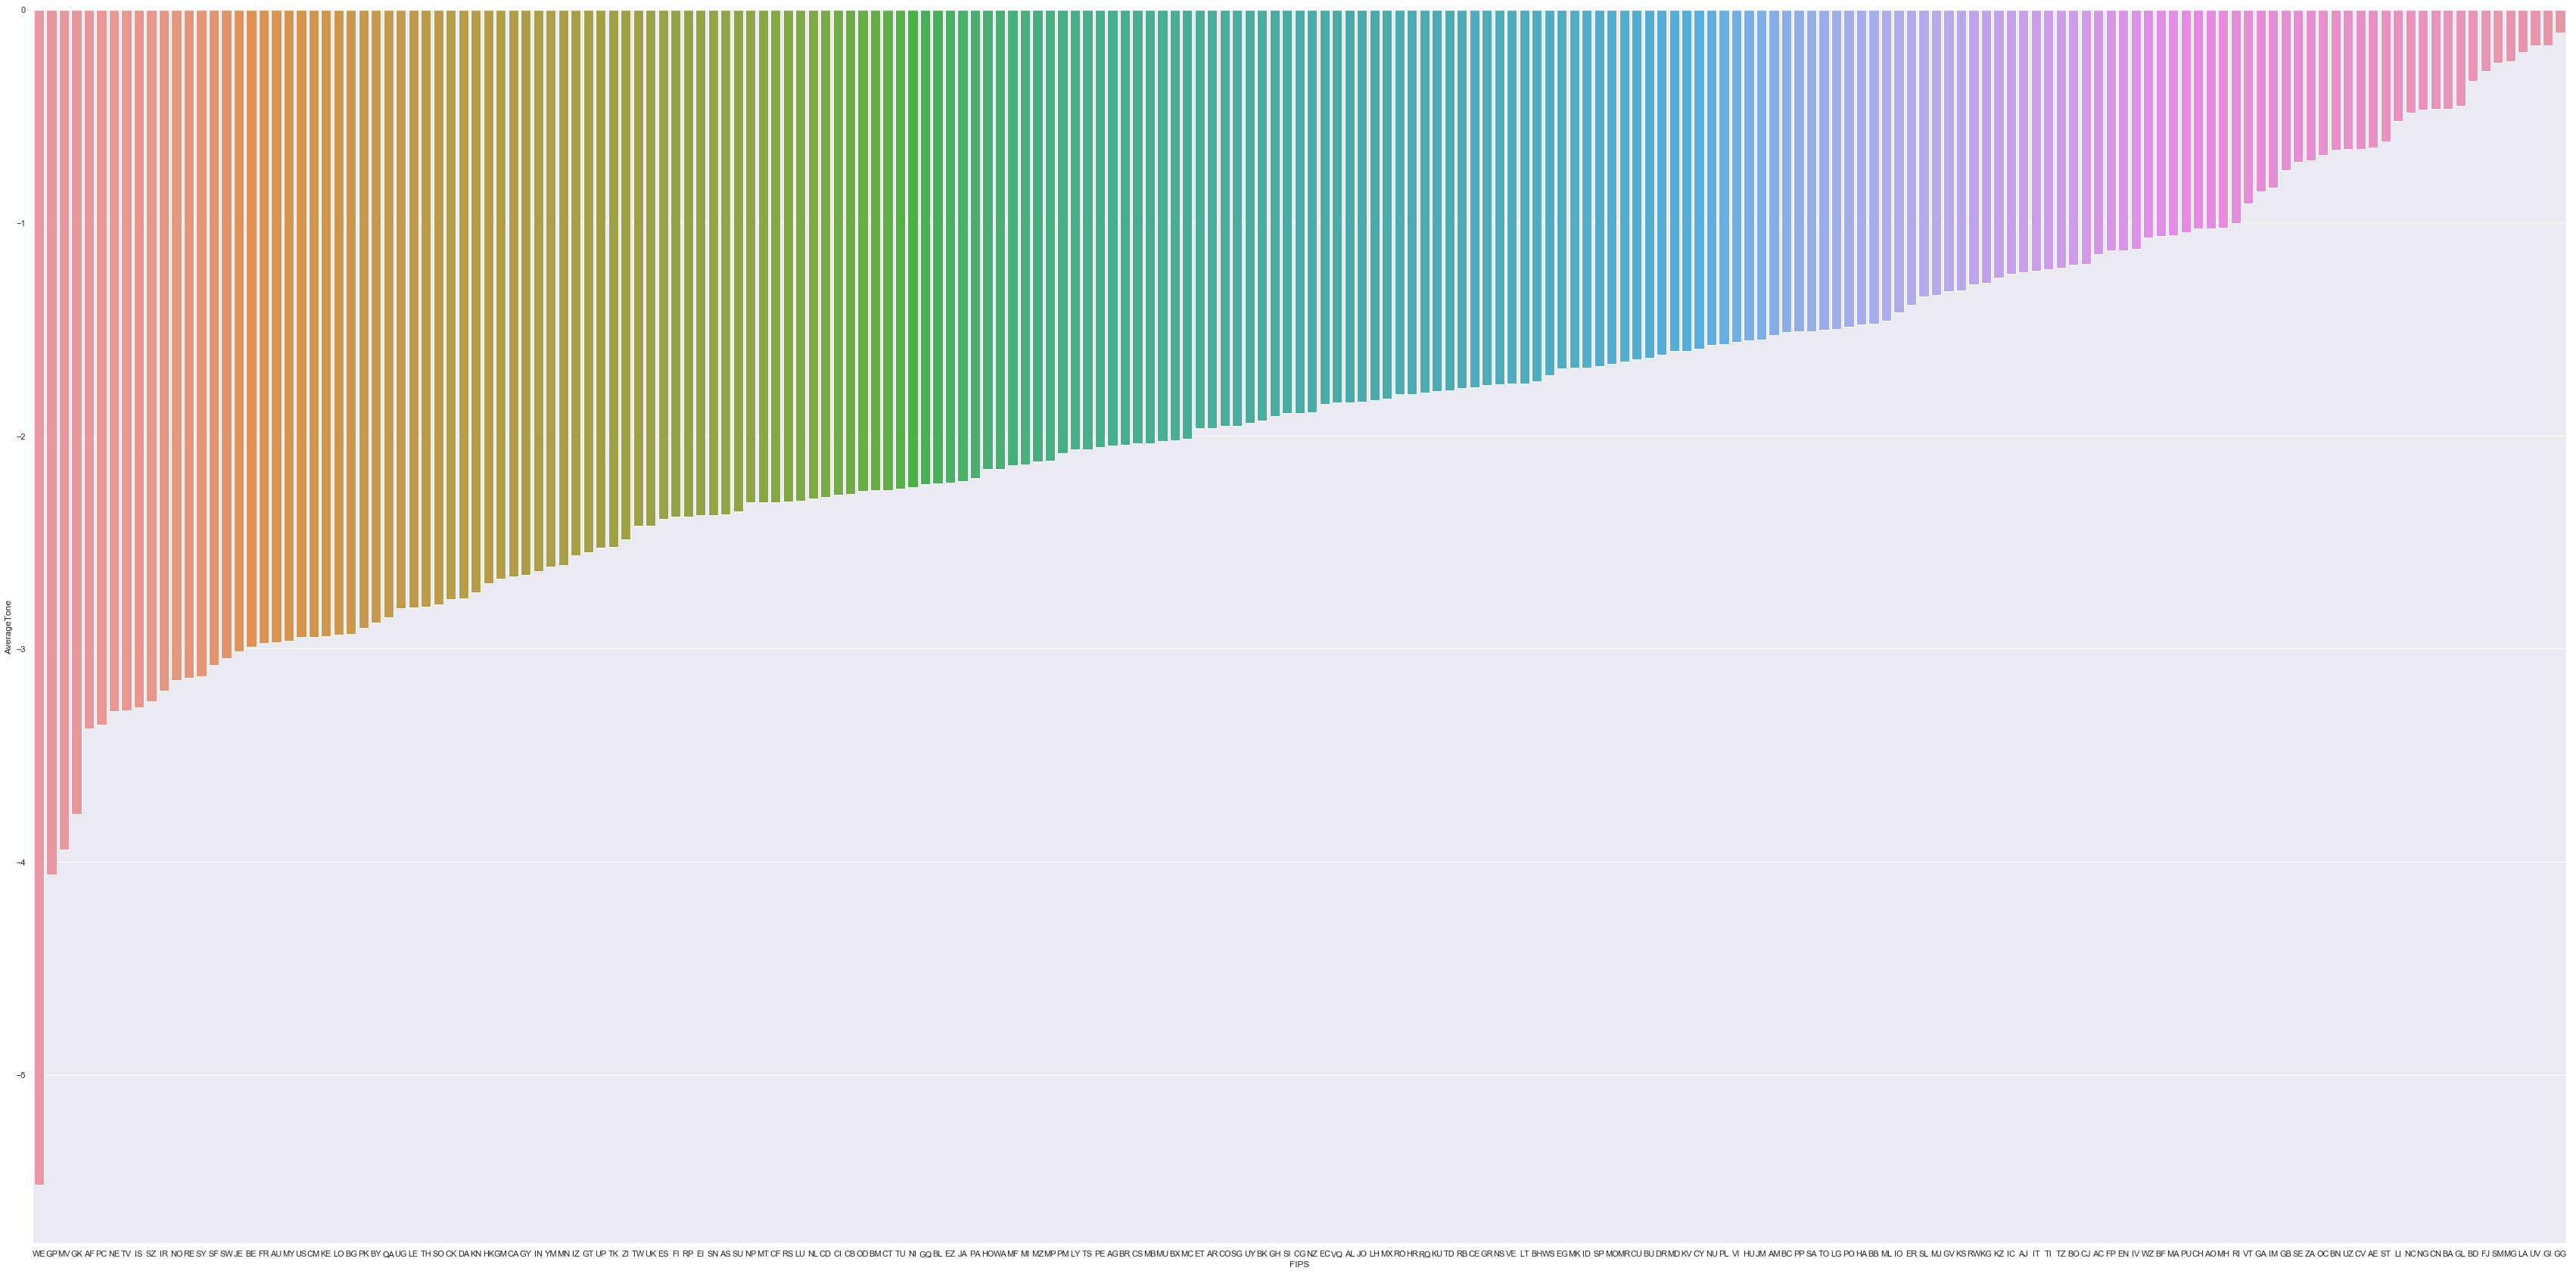

In [9]:
avgTone_neg = avgTone.filter('AverageTone <= 0')
avgTone_neg_pandas = avgTone_neg.toPandas()
avgTone_neg_pandas.sort_values('AverageTone', ascending=True, inplace=True)

sn.set(rc={'figure.figsize':(60,30)})
plot = sn.barplot(x='FIPS', y='AverageTone',data=avgTone_neg_pandas)
fig = plot.get_figure()

Now, we will try to see if there is somehow a correlation between the overall Happiness of the country inhabitants.

As explained above, we join `avgToneBySourceLocation_table` with the `happiness_table` which contains the Happiness score related to each FIPS country code.

In [10]:
happiness = spark.read.option("sep", ";").option('header', 'true').csv("HappinessCustom.csv")\
    .select('FIPS', 'Happiness_score').dropna()
    
happiness = happiness.withColumn('Happiness_score', happiness["Happiness_score"].cast(FloatType()))
print(happiness.dtypes)
happiness.show()
happiness.registerTempTable("happiness_table")

[('FIPS', 'string'), ('Happiness_score', 'float')]
+----+---------------+
|FIPS|Happiness_score|
+----+---------------+
|  FI|          7.632|
|  NO|          7.594|
|  DK|          7.555|
|  IC|          7.495|
|  SZ|          7.487|
|  NL|          7.441|
|  CA|          7.328|
|  NZ|          7.324|
|  SW|          7.314|
|  AS|          7.272|
|  IS|           7.19|
|  AU|          7.139|
|  CS|          7.072|
|  EI|          6.977|
|  GM|          6.965|
|  BE|          6.927|
|  LU|           6.91|
|  US|          6.886|
|  UK|          6.814|
|  AE|          6.774|
+----+---------------+
only showing top 20 rows



In [11]:
query = """
select happiness_table.FIPS, Happiness_score, AverageTone
from happiness_table
inner join avgTone_table
on happiness_table.FIPS = avgTone_table.FIPS
"""

joinedTable = spark.sql(query)
joinedTable.show()

+----+---------------+-----------+
|FIPS|Happiness_score|AverageTone|
+----+---------------+-----------+
|  IT|            6.0|  -1.226632|
|  WA|          4.441| -2.1564388|
|  CM|          4.975| -2.9449713|
|  ML|          4.447| -1.4626036|
|  MG|          5.125|-0.24210924|
|  PK|          5.472| -2.9042194|
|  GH|          4.657| -1.9078196|
|  KZ|           5.79| -1.2593573|
|  IN|           4.19| -2.6352217|
|  MI|          3.587| -2.1356432|
|  LT|          3.808| -1.7559838|
|  GB|          4.758|-0.75436354|
|  UK|          6.814| -2.4232247|
|  AU|          7.139|  -2.968697|
|  RS|           5.81| -2.3112888|
|  TW|          6.441| -2.4235868|
|  BG|            4.5| -2.9303584|
|  IC|          7.495| -1.2405035|
|  ET|           4.35| -1.9656553|
|  UP|          4.103| -2.5247657|
+----+---------------+-----------+
only showing top 20 rows



/home/lburget/anaconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


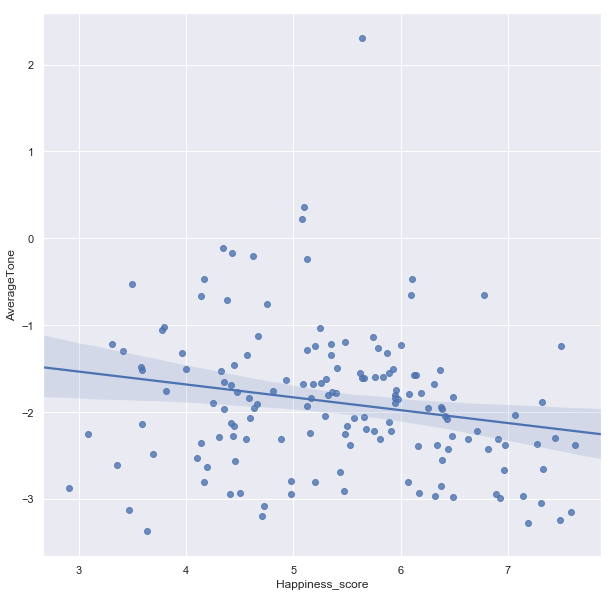

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] =10
plt.rcParams["figure.figsize"] = fig_size

joined_df = joinedTable.toPandas()
sn.regplot(x='Happiness_score', y='AverageTone', data=joined_df)

In [13]:
pearson_coef = joined_df['Happiness_score'].corr(joined_df['AverageTone'])
print(pearson_coef)

-0.19776258027613083


As we can see, the result is quite surprising (or deceiving). It seems that there is only a weak correlation between Happiness score and average mediatic tone, and it is rather negative. 
This would illustrate the fact that maybe the medias are not influencing too much the inhabitants' mood and that their tone is not representative of the overall atmosphere.

### 3. Is there a link with the political schedule ?

#### US 2016 ELECTION

In [14]:
US_electionPreceedingMentions = spark.read.option("sep",",").option('header', 'true')\
    .csv("US_electionPreceeding_mentions.csv")
US_electionPreceedingMentions.show()

+--------------------+-----------+
|   MentionSourceName|AverageTone|
+--------------------+-----------+
|        brynmawr.edu|        0.0|
|         umhoops.com|        0.0|
|     celectrical.com|        0.0|
|        calbears.com|        0.0|
|broadbandbreakfas...|        0.0|
|       skiracing.com|        0.0|
|    leroyfcpress.com|        0.0|
|illinoisentertain...|        0.0|
|     cwuobserver.com|        0.0|
|neworleanssaints.com|        0.0|
|    pacifictakes.com|        0.0|
|   techfragments.com|        0.0|
|   battellemedia.com|        0.0|
|   thelocalvoice.net|        0.0|
|     bleedinblue.com|        0.0|
|acmepackingcompan...|        0.0|
|     akhbar-tech.com|        0.0|
|        dxcoffee.com|        2.0|
|       myballard.com|       -2.5|
|        sfappeal.com|       -5.5|
+--------------------+-----------+
only showing top 20 rows



## Future queries

<ul> 
   <li>Which event types are associated with negative tones ? </li>

   <li> Is there a correlation between the negativity of a news and the number of mentions ? The duration of its mediatic coverage ? </li>
</ul>



From now, we will use the dataset available on google [BigQuerry](https://bigquery.cloud.google.com/table/gdelt-bq:gdeltv2.events) service. 

To be able to study the representation of one country by the media of another, we decided join the Mention and the Event. From the first one we retrive the tone (*MentionDocTone*) of the mention and the location of the source, based on *source_by_country*. From the latter we get the [CAMEO](https://www.gdeltproject.org/data/documentation/CAMEO.Manual.1.1b3.pdf) code and the location of the event.

After uploading *source_by_country.csv* we used the folowing SQL querry to retrives our data. 

In [29]:
output_intercountry_tone_count = pd.read_csv(data_folder+'output_intercountry_tone_count_table.csv', \
                                             dtype={'EventRootCode': np.str})

In [30]:
output_intercountry_tone_count.head()

,EventRootCode,LocMention,LocEvent,AverageTone,NumberOfInterMentions
0,X,VE,NaN,-1.694915,2
1,--,AS,NaN,-5.860806,2
2,--,AS,AS,-3.122265,5
3,--,CA,NaN,-0.425331,6
4,--,CA,CA,-0.700771,2


In [28]:
output_intercountry_tone_count.dtypes

EventRootCode             object
LocMention                object
LocEvent                  object
AverageTone              float64
NumberOfInterMentions      int64
dtype: object

In [52]:
CAME0_translation = pd.read_csv(data_folder+'CAMEO_code', header=None, sep=':', names=['Code', 'Translation'], dtype={'Code': np.str})

In [53]:
CAME0_translation

,Code,Translation
0,01,MAKE PUBLIC STATEMENT
1,010,"Make statement, not specified below"
2,011,Decline comment
3,012,Make pessimistic comment
4,013,Make optimistic comment
5,014,Consider policy option
6,015,Acknowledge or claim responsibility
7,016,Deny responsibility
8,017,Engage in symbolic act
9,018,Make empathetic comment
